In [1]:
import pandas as pd
import os
from itables import show
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [2]:
#finding out how many cpu cores you have
!wmic cpu get NumberOfCores,NumberOfLogicalProcessors

#divide the work between the existing cores - 1
os.environ['OMP_NUM_THREADS']='7'

NumberOfCores  NumberOfLogicalProcessors  

4              8                          





# Data from Umweltbundesamt

In [19]:
percentage_emission = pd.read_csv('D:\\Data Science\\VS Code\\final_project\\Luftmessung_Darmstadt\\air_emission_umweltbundesamt.CSV', sep = ';')
percentage_emission.replace(',', '.', regex=True, inplace=True)
percentage_emission.set_index('Unnamed: 0', inplace=True)
percentage_emission = percentage_emission[['O3', 'PM2,5', 'NO2']].astype('float')

percentage_emission

,O3,"PM2,5",NO2
Unnamed: 0,,,
2000,43.9,254.5,171.8
2001,49.8,242.6,168.1
2002,34.1,269.2,163.9
2003,72.8,310.5,184.5
2004,39.7,236.9,157.3
2005,39.1,239.5,157.8
2006,61.4,260.9,162.1
2007,33.9,216.8,144.1
2008,34.5,191.8,144.8


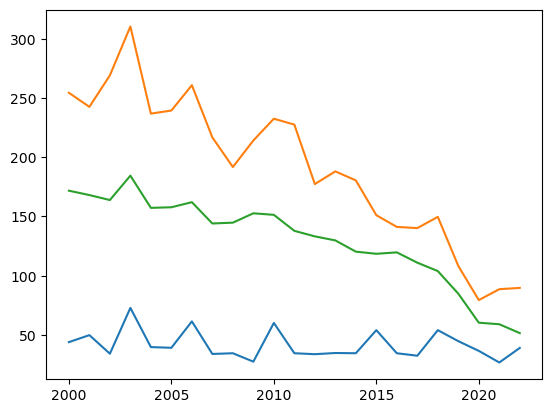

In [20]:
plt.plot(percentage_emission)
plt.show()

In [3]:
traffic = pd.read_csv('traffic.csv')
weather = pd.read_csv('weather_data.csv')
emissions = pd.read_csv('emission_huegelstr.csv')